<a href="https://colab.research.google.com/github/JoelVeerbeek/course-winc/blob/main/Eindopdracht_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The comment can in netherlands and also in english.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**1. What is the biggest predictor of a large CO2 output per capita of a country?**

Loading the raw data link from OWID

In [2]:
# Loading data

url_co2 = "https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv" # data Co2

df_co2 = pd.read_csv(url_co2)

In [3]:
df_co2.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct',
       'co2_including_luc', 'co2_including_luc_growth_abs',
       'co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
       'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'land_use_change_co2', 'land_use_chang

**Data filteren**

Im going for the 9 biggest countries and Netherlands. I also apply a filter from the year 1980.


In [4]:
columns = ["country", "year", "population", "gdp", "coal_co2_per_capita", "co2_per_capita" ]
country = ["United States", "India", "China", "Russia", "Germany", "Japan", "South Korea", "Indonesia", "Iran", "Netherlands"]

filter_co2 = (
    df_co2[df_co2["country"].isin(country) & (df_co2["year"] >= 1980)]
    [columns].copy()
)
#GDP per capita
filter_co2["gdp_per_capita"] = filter_co2["gdp"] / filter_co2["population"]

A clea dataset with only the data what i need.

In [5]:
filter_co2

,country,year,population,gdp,coal_co2_per_capita,co2_per_capita,gdp_per_capita
9889,China,1980,9.831635e+08,1.893784e+12,1.142,1.520,1926.214178
9890,China,1981,9.977211e+08,1.949955e+12,1.128,1.480,1954.409240
9891,China,1982,1.013588e+09,2.128598e+12,1.232,1.585,2100.061954
9892,China,1983,1.029065e+09,2.278862e+12,1.285,1.646,2214.498095
9893,China,1984,1.043850e+09,2.534000e+12,1.393,1.767,2427.552964
...,...,...,...,...,...,...,...
48003,United States,2020,3.394362e+08,1.802736e+13,2.516,13.817,53109.721409
48004,United States,2021,3.401614e+08,1.909938e+13,2.880,14.758,56147.981606
48005,United States,2022,3.415340e+08,1.949317e+13,2.683,14.802,57075.336109
48006,United States,2023,3.434773e+08,NaN,2.209,14.319,NaN


Creating graphs to visualize the data

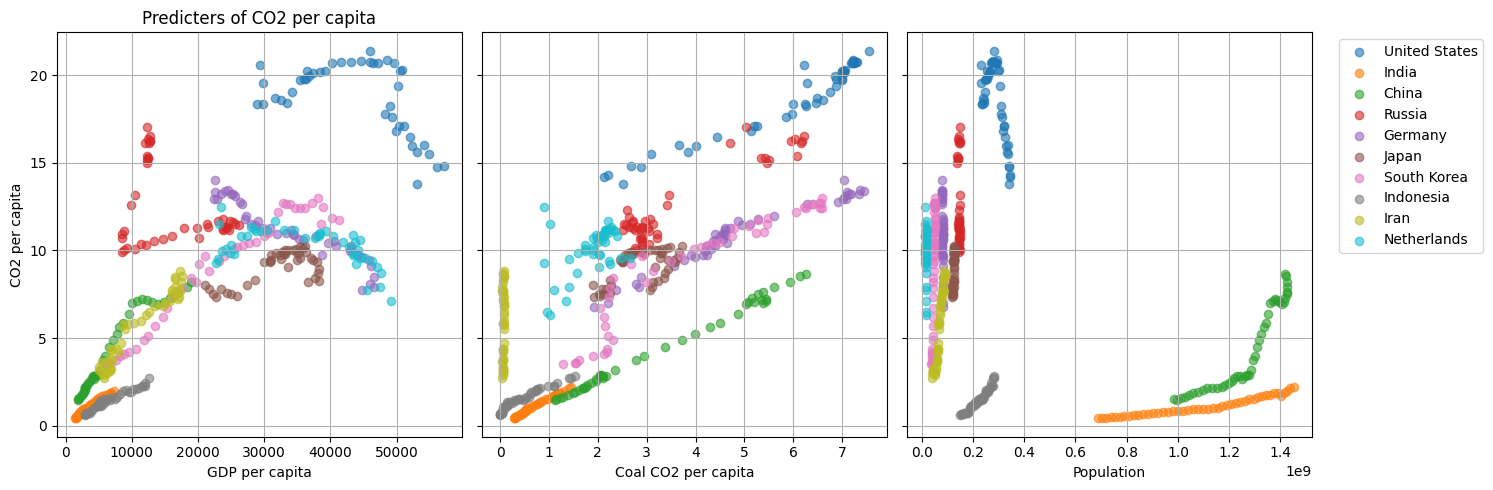

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

predicters = [("gdp_per_capita", "GDP per capita"), ("coal_co2_per_capita", "Coal CO2 per capita"), ("population", "Population")]

for ax,(xcol, xlabel) in zip(axes, predicters):
  for c in country:
    subset = filter_co2[filter_co2["country"] == c]

    ax.scatter(
        subset[xcol],
        subset['co2_per_capita'],
        alpha=0.6,
        label=c
    )

  ax.set_xlabel(xlabel)
  ax.grid(True)

axes[0].set_ylabel("CO2 per capita")
axes[0].set_title("Predicters of CO2 per capita")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

**What is the biggest predictor of a large CO2 output per capita of a country?**

The visuals show that GPD per capita and coal-related emissions have a clear positive relationship with CO2 emissions per capita, while population shows little to no correlation. This indicates that wealth and energy sources are much stronger predictors of per-capita emissions than population size. Looking at the graphs you see the strongest upward line in the coal CO2 per capita, which indicate this is the biggest predictor.



---



**2. Which countries are making the biggest strides in decreasing CO2 output?**

im going to use the same dateset, but im gonna make a new df

In [7]:
# Loading data
url = "https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv" # data Co2
df = pd.read_csv(url)

In [8]:
df

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1750,AFG,2802560.0,NaN,0.000,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1751,AFG,NaN,NaN,0.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1752,AFG,NaN,NaN,0.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1753,AFG,NaN,NaN,0.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1754,AFG,NaN,NaN,0.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50406,Zimbabwe,2020,ZWE,15526887.0,2.317871e+10,0.496,0.032,8.491,-1.776,-17.298,...,NaN,0.106,0.001,0.001,0.002,0.0,24.146,14.463,1.991,23.450
50407,Zimbabwe,2021,ZWE,15797220.0,2.514009e+10,0.542,0.034,10.223,1.732,20.398,...,NaN,0.105,0.001,0.001,0.002,0.0,27.907,16.408,2.137,20.899
50408,Zimbabwe,2022,ZWE,16069061.0,2.590159e+10,0.387,0.024,12.232,2.009,19.653,...,NaN,0.104,0.001,0.001,0.002,0.0,29.917,18.830,1.380,11.283
50409,Zimbabwe,2023,ZWE,16340829.0,NaN,0.387,0.024,13.443,1.211,9.904,...,NaN,0.103,0.001,0.001,0.002,0.0,31.029,20.318,1.876,13.957


Filter the dataset for the new exercise

In [9]:
# Filter data
country = ["United States", "India", "China", "Russia", "Germany", "Japan", "South Korea", "Indonesia", "Iran", "Netherlands"]
columns = ["country", "year","co2_per_capita" ]
years = [2000, 2020]

df_filter = (
    df[df["country"].isin(country) & (df["year"].isin(years))][columns] .copy()
)

df_filter.head()

,country,year,co2_per_capita
9909,China,2000,2.870
9929,China,2020,7.641
18295,Germany,2000,10.990
18315,Germany,2020,7.739
21738,India,2000,0.933


Making the  visual per capital.

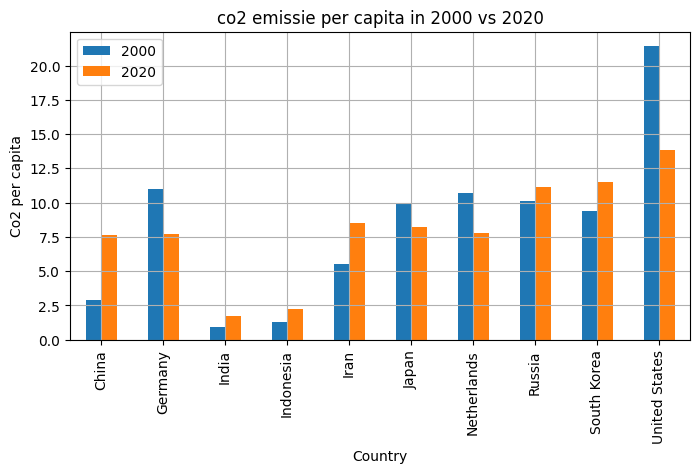

In [10]:
# plot the data
df_plt = df_filter.pivot(index="country", columns= "year", values="co2_per_capita")

df_plt.plot(kind= "bar", figsize=(8,4))

plt.xlabel("Country")
plt.ylabel("Co2 per capita")
plt.title("co2 emissie per capita in 2000 vs 2020")
plt.grid(True)
plt.legend(loc="upper left")
plt.show()

Making a data tabel witch percentage

In [11]:
# filter the data
country = ["United States", "India", "China", "Russia", "Germany", "Japan", "South Korea", "Indonesia", "Iran", "Netherlands"]
columns = ["country", "year","co2" ]

# Making the table
df_tabel = (
    df[(df["country"].isin(country)) & (df["year"].isin([2000, 2020]))]
    .pivot(index="country", columns= "year", values = "co2")
)

df_tabel["difference"] = df_tabel[2020] - df_tabel[2000]
df_tabel["percent difference"] = (df_tabel["difference"] / df_tabel[2000]) * 100

df_tabel

year,2000,2020,difference,percent difference
country,,,,
China,3643.810,10896.521,7252.711,199.041964
Germany,898.976,647.177,-251.799,-28.009535
India,987.065,2422.732,1435.667,145.448071
Indonesia,281.054,623.304,342.250,121.773752
Iran,367.213,745.596,378.383,103.041831
Japan,1260.203,1037.285,-222.918,-17.689055
Netherlands,172.154,136.974,-35.180,-20.435192
Russia,1480.576,1631.902,151.326,10.220752
South Korea,439.981,597.634,157.653,35.831775


**Which countries are making the biggest strides in decreasing CO2 output?**

Between 2000 and 2020, countries show very different trends in CO2 emissions per capita. Germany achieved the largest relative reduction(-28%) followed by the united states (-22%) and the Netherlands (-20%). Japan also showed a notable decrease. In contrast, CO2 emissions per capita increased strongly in China (+199%) and India (+145%). Several Western countries made significant progress in reducing CO2 emissions per capita.



---



**3. Which non-fossil fuel energy technology will have the best price in the future?**

Loading the dataset.

In [12]:
# Load data
url = "https://ourworldindata.org/grapher/levelized-cost-of-energy.csv" # Cost of energy
df_fossil = pd.read_csv(url)

df_fossil.columns

Index(['Entity', 'Code', 'Year', 'Bioenergy levelized cost of energy',
       'Geothermal levelized cost of energy',
       'Offshore wind levelized cost of energy',
       'Solar photovoltaic levelized cost of energy',
       'Concentrated solar power levelized cost of energy',
       'Hydropower levelized cost of energy',
       'Onshore wind levelized cost of energy'],
      dtype='object')

In [13]:
df_fossil

,Entity,Code,Year,Bioenergy levelized cost of energy,Geothermal levelized cost of energy,Offshore wind levelized cost of energy,Solar photovoltaic levelized cost of energy,Concentrated solar power levelized cost of energy,Hydropower levelized cost of energy,Onshore wind levelized cost of energy
0,Argentina,ARG,1995,NaN,NaN,NaN,NaN,NaN,NaN,0.287333
1,Argentina,ARG,1997,NaN,NaN,NaN,NaN,NaN,NaN,0.146460
2,Argentina,ARG,2008,NaN,NaN,NaN,NaN,NaN,NaN,0.563346
3,Argentina,ARG,2009,NaN,NaN,NaN,NaN,NaN,NaN,0.317437
4,Argentina,ARG,2012,NaN,NaN,NaN,NaN,NaN,NaN,0.122855
...,...,...,...,...,...,...,...,...,...,...
847,World,OWID_WRL,1995,NaN,NaN,NaN,NaN,NaN,NaN,0.231539
848,World,OWID_WRL,1996,NaN,NaN,NaN,NaN,NaN,NaN,0.206777
849,World,OWID_WRL,1997,NaN,NaN,NaN,NaN,NaN,NaN,0.180930
850,World,OWID_WRL,1998,NaN,NaN,NaN,NaN,NaN,NaN,0.169605


Making a graph with best future price (world-data)

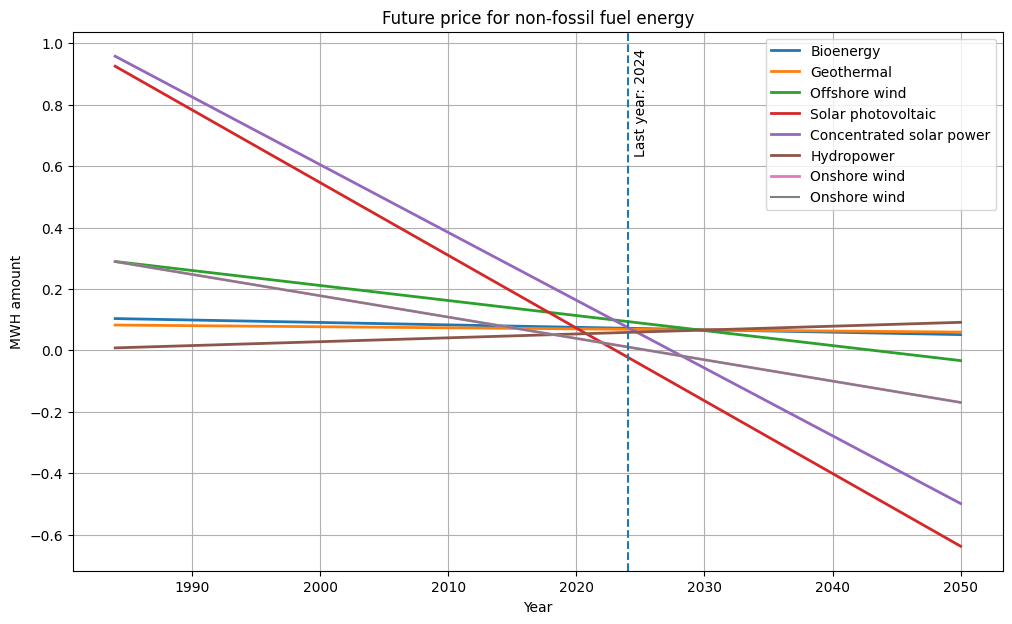

In [14]:
# Filter the data
df_graph = df_fossil[df_fossil["Entity"] == "World"].copy()
future = 2050
min_year = int(df_graph["Year"].min())
max_year = int(df_graph["Year"].max())
years_all = np.arange(min_year, future + 1)

# Plot empty figure
plt.figure(figsize=(12, 7))

columns = ['Bioenergy levelized cost of energy',
       'Geothermal levelized cost of energy',
       'Offshore wind levelized cost of energy',
       'Solar photovoltaic levelized cost of energy',
       'Concentrated solar power levelized cost of energy',
       'Hydropower levelized cost of energy',
       'Onshore wind levelized cost of energy'
]

# Making for loop for each tech
for col in columns:
  df3 = df_graph[["Year", col]].dropna()

  years = df3["Year"].values
  values = df3[col].values

  a, b = np.polyfit(years, values, 1)
  predict = a * years_all + b

  tech_name = col.replace(" levelized cost of energy", "")
  plt.plot(years_all, predict, linewidth=2, label=tech_name)

plt.plot(years_all, predict, label=tech_name)
plt.axvline(x=max_year, linestyle="--")

plt.text(max_year + 0.5,
         plt.ylim()[1]* 0.95,
         f"Last year: {max_year}",
         rotation=90, va="top")

plt.title("Future price for non-fossil fuel energy")
plt.xlabel("Year")
plt.ylabel("MWH amount")
plt.legend()
plt.grid(True)
plt.show()


The linear regressions suggest that the most non-fossil energy wil keep getting cheaper toward 2050. According to the predictions in the graph, solar photovoltaic shows the biggest cost decline and is projected to become the cheapest option.

**The comment can in netherlands and also in english.**